In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import os
from sklearn.metrics import r2_score


import ar_analysis as ara
import processing as arp

In [123]:
sharc_base_path = '/archive/Marc.Prange/LM4p2_SHARC'
sharc_exp_name = 'providence_lm4sharc_ksat0016_angle087rad_ep26_114y_surfrunoff'

In [124]:
base_path = '/archive/Marc.Prange/'
model_exp_name = 'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020'
model_exp_p2K_name = 'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1day_p2K'
obs_name = 'c192_obs'

In [125]:
sharc_data = arp.load_sharc_composite_ds(
    start_year=1990, end_year=2014, base_path=sharc_base_path, exp_name=sharc_exp_name, min_precip=20, ar_str='all_days', precip_var='pr')

In [63]:
arp.store_sharc_composite_ds(1990, 2014, sharc_base_path, sharc_exp_name, 20, False, 'pr', False)

Loading sharc atmos data for year 1990...
Loading sharc ptid data for year 1990...
Loading sharc atmos data for year 1991...
Loading sharc ptid data for year 1991...
Loading sharc atmos data for year 1992...
Loading sharc ptid data for year 1992...
Loading sharc atmos data for year 1993...
Loading sharc ptid data for year 1993...
Loading sharc atmos data for year 1994...
Loading sharc ptid data for year 1994...
Loading sharc atmos data for year 1995...
Loading sharc ptid data for year 1995...
Loading sharc atmos data for year 1996...
Loading sharc ptid data for year 1996...
Loading sharc atmos data for year 1997...
Loading sharc ptid data for year 1997...
Loading sharc atmos data for year 1998...
Loading sharc ptid data for year 1998...
Loading sharc atmos data for year 1999...
Loading sharc ptid data for year 1999...
Loading sharc atmos data for year 2000...
Loading sharc ptid data for year 2000...
Loading sharc atmos data for year 2001...
Loading sharc ptid data for year 2001...
Load

In [41]:
sharc_data.load().lon

<xarray.DataArray 'lon' ()>
array(-119.1975)
Coordinates:
    grid_index  float64 0.0
    lon         float64 -119.2
    lat         float64 37.05
    geolat_t    float32 37.05
    geolon_t    float32 -119.2
Attributes:
    long_name:  longitude
    units:      degrees_E
    axis:       X
    edges:      lonb

In [47]:
na_data = xr.open_mfdataset(
        '/archive/Marc.Prange/na_data/c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020/'
        'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020_na_*.nc').load()
arp.store_loc_model_data(
    1990, 2020, 37.0525, -119.1975, 'providence', na_data, '/archive/Marc.Prange/', 
    'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020', 
    variables=['ts', 'prw', 'pr', 'prsn', 'ivtx', 'ivty', 'mrro', 'mrsos', 'mrso', 'snw', 'evap_land', 'precip', 'rv_d_h2o', 'rv_o_h2o'],
    )

Storing providence data for 1990...
Storing providence data for 1991...
Storing providence data for 1992...
Storing providence data for 1993...
Storing providence data for 1994...
Storing providence data for 1995...
Storing providence data for 1996...
Storing providence data for 1997...
Storing providence data for 1998...
Storing providence data for 1999...
Storing providence data for 2000...
Storing providence data for 2001...
Storing providence data for 2002...
Storing providence data for 2003...
Storing providence data for 2004...
Storing providence data for 2005...
Storing providence data for 2006...
Storing providence data for 2007...
Storing providence data for 2008...
Storing providence data for 2009...
Storing providence data for 2010...
Storing providence data for 2011...
Storing providence data for 2012...
Storing providence data for 2013...
Storing providence data for 2014...
Storing providence data for 2015...
Storing providence data for 2016...
Storing providence data for 

In [49]:
arp.store_loc_composite_ds(
    1990, 2019, 'providence', '/archive/Marc.Prange/', 
    'c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020', 
    20, False)

Loading loc_data for providence
Creating temporal composite for loc 37.25, -119.06
Found 180 precip events.


In [5]:
sharc_data.load()

<xarray.Dataset>
Dimensions:               (time: 11, nv: 2, lonb: 2, latb: 3, ptid: 8,
                           time_of_day_edges_24: 25, zfull_soil: 20,
                           zhalf_soil: 21, case: 1282)
Coordinates: (12/14)
  * time                  (time) timedelta64[ns] -5 days -4 days ... 5 days
  * nv                    (nv) float64 1.0 2.0
  * lonb                  (lonb) float64 -124.0 -123.9
  * latb                  (latb) float64 47.7 47.74 47.74
  * ptid                  (ptid) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0
  * time_of_day_edges_24  (time_of_day_edges_24) datetime64[ns] 1901-01-01 .....
    ...                    ...
    grid_index            float64 0.0
    lon                   float64 -123.9
    lat                   float64 47.72
    geolat_t              float32 47.72
    geolon_t              float32 -123.9
  * case                  (case) int64 0 1 2 3 4 5 ... 1277 1278 1279 1280 1281
Data variables: (12/57)
    frac                  (case, time, ptid) float32 0.08977 0.08745 ... 0.2825
    area                  (case, time, ptid) float32 1.195e+06 ... 3.76e+06
    ttype                 (case, time, ptid) float32 3.0 3.0 3.0 ... 3.0 3.0 3.0
    cVeg                  (case, time, ptid) float32 16.97 16.36 ... 19.35 19.25
    tran                  (case, time, ptid) float32 4.903e-09 ... 7.736e-07
    t_ref                 (case, time, ptid) float32 273.3 273.1 ... 278.4 278.4
    ...                    ...
    co2_atm               (case, time) float32 0.00043 0.0004298 ... 0.0004294
    co2_atm_dvmr          (case, time) float32 0.0002843 0.0002843 ... 0.0002843
    co2_surf_dvmr         (case, time) float32 0.0003804 0.0003263 ... 0.0003951
    co2_mol_flux          (case, time) float32 1.273e-06 1.79e-06 ... 7.335e-07
    pr                    (case, time) float32 2.385e-05 0.0001628 ... 1.045e-06
    strong_precip_date    (case, time) datetime64[ns] 1990-01-02 ... 2014-12-30

## Load AR composite data

In [126]:
model_data = arp.load_loc_composite_ds(
    start_year=1990, end_year=2019, base_path=base_path, exp_name=model_exp_name, loc_name='providence', min_precip=20, ar_str='all_days')
model_p2K_data = arp.load_loc_composite_ds(
    start_year=1990, end_year=2019, base_path=base_path, exp_name=model_exp_p2K_name, loc_name='providence', min_precip=20, ar_str='all_days')
# obs_data = arp.load_loc_composite_ds(
#     start_year=1990, end_year=2020, base_path=base_path, exp_name=obs_name, loc_name='crater_lake', min_precip=0, ar_str='AR_days')
# print(f'#cases model: {model_data.case.shape[0]}')
# print(f'#cases obs: {obs_data.case.shape[0]}')
land_static = arp.lon_360_to_180(xr.open_dataset(
    '/archive/Ming.Zhao/awg/2022.03/c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_2020/gfdl.ncrc4-intel-prod-openmp/pp/land/land.static.nc'
    )).sel({'lat': model_data.lat, 'lon': model_data.lon})
land_static.mrsofc.values

array(4356.8315, dtype=float32)

In [44]:
model_data.load()

<xarray.Dataset>
Dimensions:             (case: 432, time: 11, bnds: 2)
Coordinates:
  * bnds                (bnds) float64 1.0 2.0
    lat                 float64 45.75
    lon                 float64 -122.8
  * time                (time) timedelta64[ns] -5 days -4 days ... 4 days 5 days
  * case                (case) int64 0 1 2 3 4 5 6 ... 426 427 428 429 430 431
Data variables: (12/24)
    average_DT          (case, time) timedelta64[ns] 1 days 1 days ... 1 days
    average_T1          (case, time) datetime64[ns] 1990-01-02 ... 2019-12-24
    average_T2          (case, time) datetime64[ns] 1990-01-03 ... 2019-12-25
    lat_bnds            (case, time, bnds) float64 45.5 46.0 45.5 ... 45.5 46.0
    lon_bnds            (case, time, bnds) float64 236.9 237.5 ... 236.9 237.5
    time_bnds           (case, time, bnds) object 1990-01-02 00:00:00 ... 201...
    ...                  ...
    ivty                (case, time) float32 -70.56 22.21 56.04 ... 1.431 19.52
    ar_shape            (case, time) float64 nan nan 1.0 1.0 ... 1.0 nan nan nan
    ar_pr               (case, time) float32 0.0 0.0 0.0003338 ... 0.0 0.0 0.0
    ar_prsn             (case, time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ar_prli             (case, time) float32 0.0 0.0 0.0003338 ... 0.0 0.0 0.0
    strong_precip_date  (case, time) datetime64[ns] 1990-01-02 ... 2019-12-24
Attributes:
    title:                 c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_1979
    associated_files:      area: 19900101.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  19.1
    git_hash:              c97c1f6afab0df3545ee82c337d51accc4205bc3
    creationtime:          Fri Dec  9 11:26:10 2022
    hostname:              pp034
    history:               fregrid --standard_dimension --input_mosaic C192_m...
    external_variables:    area

## Plot annual cycle of event occurrence

ValueError: x and y must have same first dimension, but have shapes (10,) and (12,)

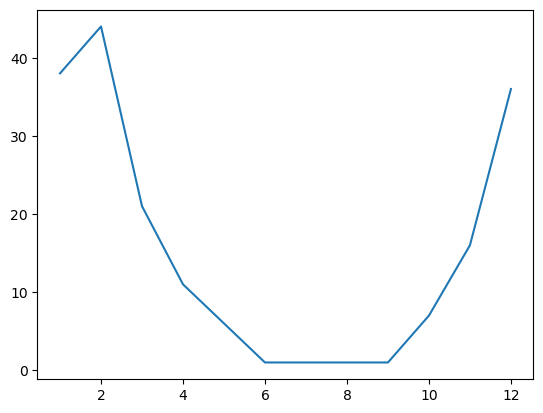

In [50]:
count_per_month_model = model_data.strong_precip_date.isel(time=5).assign_coords({'time': model_data.strong_precip_date.isel(time=5)}).groupby('time.month').count()
count_per_month_model_p2K = model_p2K_data.strong_precip_date.isel(time=5).assign_coords({'time': model_p2K_data.strong_precip_date.isel(time=5)}).groupby('time.month').count()
# count_per_month_obs = obs_data.strong_precip_date.isel(time=9).assign_coords({'time': obs_data.strong_precip_date.isel(time=9)}).groupby('time.month').count()

fig, axs = plt.subplots()
axs.plot(count_per_month_model.month, count_per_month_model)
axs.plot(count_per_month_model.month, count_per_month_model_p2K)
# axs.plot(count_per_month_obs.month, count_per_month_obs, color='black')

## Plot mean timeseries

### AM4

NameError: name 'obs_data' is not defined

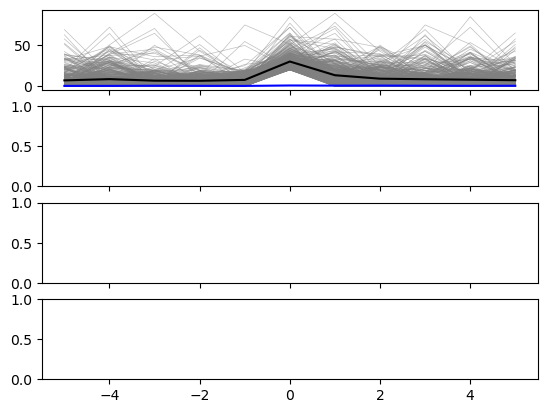

In [13]:
time = model_data.time / np.timedelta64(1, 'D')
fig, axs = plt.subplots(nrows=4, sharex=True)
axs[0].plot(time, model_data.pr.T*86400, color='gray', alpha=0.5, lw=0.5)
axs[0].plot(time, model_data.pr.mean('case')*86400, color='k')
axs[0].plot(time, model_data.prsn.mean('case')*86400, color='blue')
axs[0].plot(time, obs_data.pr.mean('case')*86400, color='green', ls='--')
axs[0].set(ylabel='precip')
axs[1].plot(time, model_data.mrro.T*86400, color='gray', alpha=0.5, lw=0.5)
axs[1].plot(time, model_data.mrro.mean('case')*86400, color='black',lw=1)
# axs[1].set_yscale('log')
axs[1].set(ylabel='runoff')

axs[2].plot(time, model_data.mrso.differentiate('time', datetime_unit='D').T, color='gray', alpha=0.5, lw=0.5)
axs[2].plot(time, model_data.mrso.mean('case').differentiate('time', datetime_unit='D'), color='black', lw=1)
axs[2].set(ylabel='SM')

axs[3].plot(time, model_data.evap_land.mean('case')*86400, color='black', lw=1)
axs[3].set(ylabel='evap')
# plt.savefig('plots/runoff/AR_composite_timeseries_providence.png', dpi=300)


### SHARC

/tmp/ipykernel_21848/2250744282.py:14: UserWarning: The following kwargs were not used by contour: 'lw'
  c = axs[2].contourf(


[Text(0, 0.5, 'evap')]

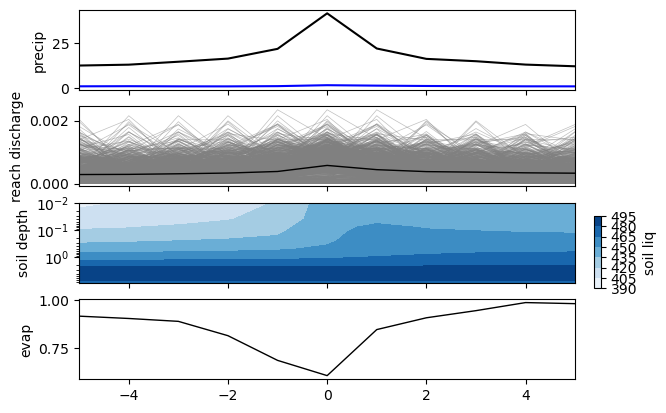

In [6]:
ptid = 1
time = sharc_data.time / np.timedelta64(1, 'D')
fig, axs = plt.subplots(nrows=4, sharex=True)
# axs[0].plot(time, (sharc_data.lprec+sharc_data.fprec).T*86400, color='gray', alpha=0.5, lw=0.5)
axs[0].plot(time, (sharc_data.lprec+sharc_data.fprec).mean('case')*86400, color='k')
axs[0].plot(time, sharc_data.fprec.mean('case')*86400, color='blue')
# axs[0].plot(time, obs_data.pr.mean('case')*86400, color='green', ls='--')
axs[0].set(ylabel='precip')
axs[1].plot(time, sharc_data.reach_discharge.sel(ptid=ptid).T, color='gray', alpha=0.5, lw=0.5)
axs[1].plot(time, sharc_data.reach_discharge.sel(ptid=ptid).mean('case'), color='black',lw=1)
# axs[1].set_yscale('log')
axs[1].set(ylabel='reach discharge')

c = axs[2].contourf(
    time, sharc_data.zfull_soil, 
    sharc_data.soil_liq.sel(ptid=ptid).mean('case').T, 
    cmap='Blues', alpha=1, lw=0.5)
axs[2].invert_yaxis()
axs[2].set_yscale('log')
cax = fig.add_axes([0.93, 0.3, 0.01, 0.15])
cb = plt.colorbar(c, cax=cax, label='soil liq')
# axs[2].plot(time, sharc_data.soil_liq.mean('case').differentiate('time', datetime_unit='D'), color='black', lw=1)
axs[2].set(ylabel='soil depth')

axs[3].plot(time, sharc_data.evap.mean('case')*86400, color='black', lw=1)
axs[3].set(ylabel='evap')
# plt.savefig('plots/runoff/sharc_composite_timeseries_providence.png', dpi=300)

In [55]:
model_p2K_data['mrro_nfpr_frac'] = model_p2K_data.mrro / model_p2K_data.prli
ro_bins = model_p2K_data.mrro.isel(time=5).quantile(np.arange(0, 1.2, 0.2))
mrro_nfpr_frac_bins = model_p2K_data.mrro_nfpr_frac.isel(time=5).quantile(np.arange(0, 1.2, 0.2))
model_data_ro_grouped = model_p2K_data.groupby_bins(model_p2K_data.mrro_nfpr_frac.isel(time=5), mrro_nfpr_frac_bins).mean()
model_data_ro_grouped_count = model_p2K_data.groupby_bins(model_p2K_data.mrro_nfpr_frac.isel(time=5), mrro_nfpr_frac_bins).count()
model_data_ro_grouped_count

<xarray.Dataset>
Dimensions:              (mrro_nfpr_frac_bins: 5, time: 11, bnds: 2)
Coordinates:
  * bnds                 (bnds) float64 1.0 2.0
    lat                  float64 45.75
    lon                  float64 -122.8
  * time                 (time) timedelta64[ns] -5 days -4 days ... 5 days
  * mrro_nfpr_frac_bins  (mrro_nfpr_frac_bins) object (0.00398, 0.0132] ... (...
Data variables: (12/25)
    average_DT           (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    average_T1           (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    average_T2           (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    lat_bnds             (mrro_nfpr_frac_bins, time, bnds) int64 94 94 ... 95 95
    lon_bnds             (mrro_nfpr_frac_bins, time, bnds) int64 94 94 ... 95 95
    time_bnds            (mrro_nfpr_frac_bins, time, bnds) int64 94 94 ... 95 95
    ...                   ...
    ar_shape             (mrro_nfpr_frac_bins, time) int64 25 21 17 ... 21 15 18
    ar_pr                (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    ar_prsn              (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    ar_prli              (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    strong_precip_date   (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
    mrro_nfpr_frac       (mrro_nfpr_frac_bins, time) int64 94 94 94 ... 95 95 95
Attributes:
    title:                 c192L33_am4p0_amip_HIRESMIP_nudge_wind_1day_p2K
    associated_files:      area: 19900101.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  2023.01.02
    git_hash:              8176c2b45079431f2053ec773253938f8aee4828
    creationtime:          Mon Mar 18 20:47:14 2024
    hostname:              pp336
    history:               fregrid --standard_dimension --input_mosaic C192_m...
    external_variables:    area

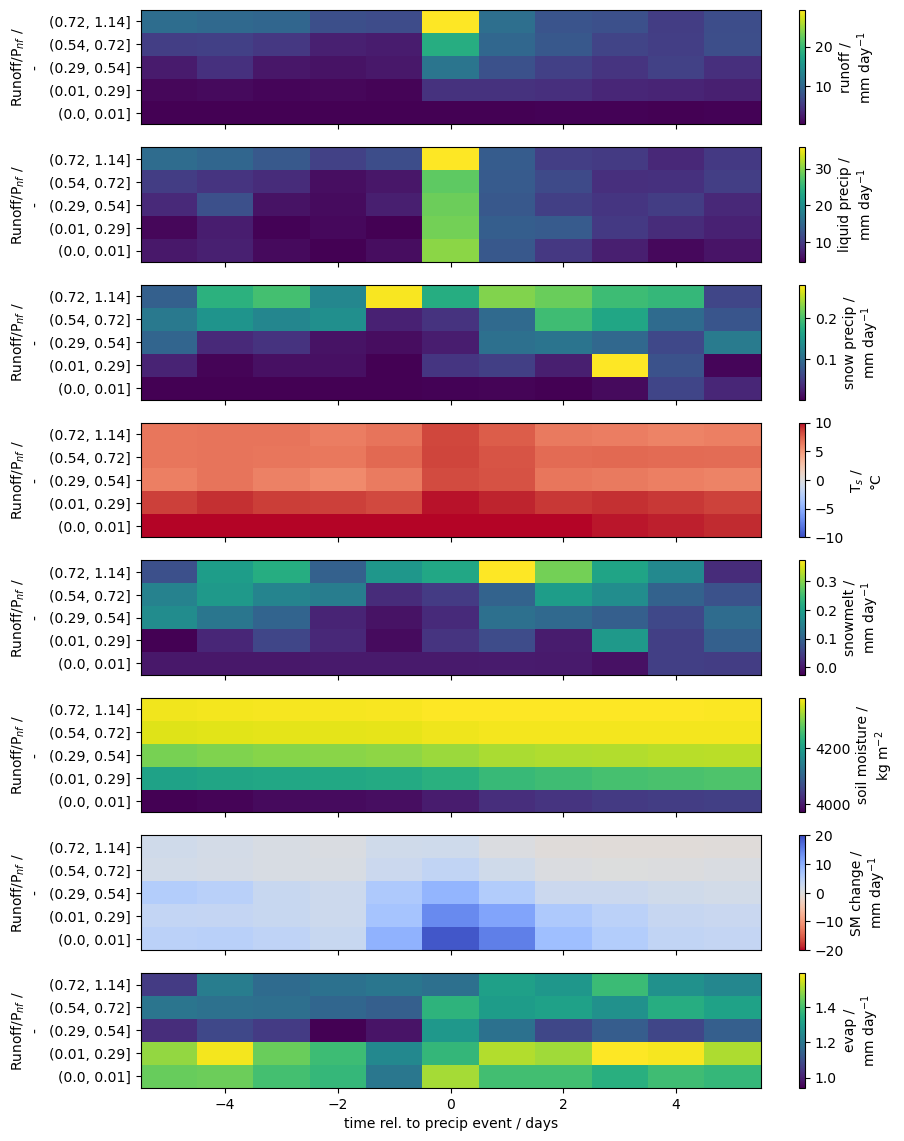

In [57]:
time = model_data.time / np.timedelta64(1, 'D')
fig, axs = plt.subplots(nrows=8, sharex=True, figsize=(10, 14))
c1 = axs[0].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.mrro*86400)
c2 = axs[1].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.prli*86400)
c3 = axs[2].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.prsn*86400)
c4 = axs[3].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.ts-273.15, 
    cmap='coolwarm', vmin=-10, vmax=10)
c5 = axs[4].pcolormesh(
    time, np.arange(0, 100, 20), 
    -(model_data_ro_grouped.snw.differentiate('time', datetime_unit='D') - model_data_ro_grouped.prsn*86400))
c6 = axs[5].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.mrso)
c7 = axs[6].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.mrso.differentiate('time', datetime_unit='D'),
    cmap='coolwarm_r', vmin=-20, vmax=20)
c8 = axs[7].pcolormesh(
    time, np.arange(0, 100, 20), 
    model_data_ro_grouped.evap_land*86400)
[ax.set_yticks(np.arange(0, 100, 20)) for ax in axs]
[ax.set_yticklabels(
    [f'({round(iv.left, 2)}, {round(iv.right, 2)}]' 
     for iv in model_data_ro_grouped.mrro_nfpr_frac_bins.values]) 
 for ax in axs]
[ax.set(ylabel='Runoff/P$_{nf}$ /\n-') for ax in axs]
axs[-1].set(xlabel='time rel. to precip event / days')
[plt.colorbar(c, label=label) 
for c, label in zip(
    [c1, c2, c3, c4, c5, c6, c7, c8],
    ['runoff /\nmm day$^{-1}$', 'liquid precip /\nmm day$^{-1}$', 'snow precip /\nmm day$^{-1}$', 'T$_{s}$ /\n°C',
     'snowmelt /\nmm day$^{-1}$', 'soil moisture /\nkg m$^{-2}$', 
     'SM change /\nmm day$^{-1}$', 'evap /\nmm day$^{-1}$'])]
# axs[-1].set(xlim=[time[4], time[14]])
# plt.savefig(
#     'plots/runoff/crater_lake_comp_20mm_events_all_days_runoff_Pnf_frac_percentile_timeseries_p2K.png', 
#     dpi=300, bbox_inches='tight')

In [27]:
model_data.mrro.max().values*86400

40.57552423328161

### SHARC

In [13]:
sharc_data['case_reach_discharge_nfprecip_frac'][:, 8]

<xarray.DataArray 'case_reach_discharge_nfprecip_frac' (case: 287)>
array([3.54286502e-01, 4.73372603e+04, 2.29279515e+01,            inf,
       1.68505638e-01, 9.65665210e-03, 8.69535804e-03, 8.43208771e-02,
       4.81007881e+00, 5.45846599e+00,            inf, 5.83587102e-02,
       5.96151507e-02, 2.69136150e-02, 1.18528912e+00,            inf,
       2.60791181e-02, 2.95823404e-02, 1.50777919e-02, 4.12887070e-01,
       2.98144238e+01, 2.17074632e+00, 8.10861147e-01, 2.08991566e-01,
       8.23882547e+00, 1.12499400e+01, 3.05024273e+01, 9.58481052e+00,
       5.61545912e-01, 2.57840282e-02, 1.69954498e+00, 4.43250806e+01,
                  inf,            inf, 1.38235695e-02,            inf,
       2.70916721e-02, 1.75583640e+00, 8.83024006e-01, 9.35131419e-01,
       1.04171705e+00, 9.22135741e-01, 8.23130036e-02, 4.24745457e-01,
       2.01494238e+00, 1.71936220e+00, 2.63658076e-01, 8.15054420e-02,
       1.88135959e-01, 9.89986565e+00, 3.36230311e-01, 4.83450235e-01,
       2.54398238e+00, 2.76007755e+01, 7.25993527e+03, 3.56639858e-01,
       7.95340787e-01, 1.92813426e-01,            inf, 1.17111927e-02,
                  inf, 1.14767694e+00, 1.20289530e+04, 6.69551926e+00,
       9.16040360e-01, 6.79321635e-01, 9.10272259e-01, 9.24124253e-02,
       1.34576106e-02, 8.26333349e-03, 3.07633006e-02, 4.49493236e+02,
       3.59423267e-01, 2.66484310e+00, 8.47066343e+00, 1.86208413e+00,
       7.65728577e+01, 6.17215209e+00, 1.13723620e+00, 4.69491607e-01,
...
       3.19283098e+00, 5.76343576e-01, 3.13971526e-02,            inf,
       8.37977418e+00,            inf, 2.45273813e+00, 1.59307316e+01,
                  inf, 8.62906459e+00,            inf,            inf,
                  inf,            inf, 8.18695749e+00,            inf,
                  inf, 5.72490464e+00, 5.88088978e-02, 1.21453703e-01,
       1.62082654e+00, 1.32608091e+00, 6.20606874e-01, 7.92504584e+00,
                  inf,            inf,            inf,            inf,
                  inf,            inf,            inf,            inf,
       5.01306115e+00,            inf, 2.23745068e+01,            inf,
                  inf,            inf, 1.92890460e+00, 2.73075060e+01,
       7.88707268e-01, 7.48049335e-02,            inf,            inf,
       3.88568267e-01,            inf,            inf, 1.14089080e+00,
                  inf, 7.34509722e+00,            inf, 1.26706139e+00,
       1.91420616e-01, 2.67906988e-02, 6.67971650e-01, 1.25246994e+00,
                  inf,            inf,            inf,            inf,
       5.07606530e+00, 1.18960608e+01, 9.66663939e+00,            inf,
       5.45655390e+00, 9.61525837e-02, 3.02545609e-01,            inf,
                  inf, 1.24095965e-01, 2.28108293e+00, 4.45659415e+00,
                  inf, 4.85941111e-01, 3.82453321e-01,            inf,
       1.18894161e-02, 4.52389630e+00,            inf])
Coordinates:
    time        timedelta64[ns] -1 days
    grid_index  float64 ...
    lon         float64 ...
    lat         float64 ...
    geolat_t    float32 ...
    geolon_t    float32 ...
  * case        (case) int64 0 1 2 3 4 5 6 7 ... 279 280 281 282 283 284 285 286

In [8]:
ptid = 1
sharc_data['case_reach_discharge'] = sharc_data.reach_discharge.sel(ptid=ptid)*86400
sharc_data['case_reach_height'] = sharc_data.reach_height.sel(ptid=ptid)
sharc_data['case_nfprecip'] = sharc_data.lprec*86400
sharc_data['case_fprecip'] = sharc_data.fprec*86400
sharc_data['case_precip'] = (sharc_data.fprec + sharc_data.lprec)*86400
sharc_data['case_snowmelt'] = -(sharc_data.snow.differentiate('time', datetime_unit='D') - sharc_data.fprec*86400).sel(ptid=ptid)
sharc_data['case_soil_moisture'] = sharc_data.soil_liq.sel(ptid=ptid).integrate('zfull_soil')
sharc_data['case_evap'] = sharc_data.evap*86400
sharc_data['case_reach_discharge_nfprecip_frac'] = sharc_data.case_reach_discharge / sharc_data.case_precip

ro_bins = sharc_data.case_reach_discharge_nfprecip_frac.isel(time=5).quantile(np.arange(0, 1.2, 0.2))
sharc_data_ro_grouped = sharc_data.groupby_bins(sharc_data.case_reach_discharge_nfprecip_frac.isel(time=5), ro_bins).mean()
sharc_data_ro_grouped_count = sharc_data.groupby_bins(sharc_data.case_reach_discharge_nfprecip_frac.isel(time=5), ro_bins).count()
sharc_data_ro_grouped_count


<xarray.Dataset>
Dimensions:                                  (time: 11, nv: 2, lonb: 2,
                                              latb: 3, ptid: 8,
                                              time_of_day_edges_24: 25,
                                              zfull_soil: 20, zhalf_soil: 21,
                                              case_reach_discharge_nfprecip_frac_bins: 5)
Coordinates: (12/14)
  * time                                     (time) timedelta64[ns] -5 days ....
  * nv                                       (nv) float64 1.0 2.0
  * lonb                                     (lonb) float64 -124.0 -123.9
  * latb                                     (latb) float64 47.7 47.74 47.74
  * ptid                                     (ptid) float64 1.0 2.0 ... 7.0 8.0
  * time_of_day_edges_24                     (time_of_day_edges_24) datetime64[ns] ...
    ...                                       ...
    grid_index                               float64 0.0
    lon                                      float64 -123.9
    lat                                      float64 47.72
    geolat_t                                 float32 47.72
    geolon_t                                 float32 -123.9
  * case_reach_discharge_nfprecip_frac_bins  (case_reach_discharge_nfprecip_frac_bins) object ...
Data variables: (12/66)
    frac                                     (case_reach_discharge_nfprecip_frac_bins, time, ptid) int64 ...
    area                                     (case_reach_discharge_nfprecip_frac_bins, time, ptid) int64 ...
    ttype                                    (case_reach_discharge_nfprecip_frac_bins, time, ptid) int64 ...
    cVeg                                     (case_reach_discharge_nfprecip_frac_bins, time, ptid) int64 ...
    tran                                     (case_reach_discharge_nfprecip_frac_bins, time, ptid) int64 ...
    t_ref                                    (case_reach_discharge_nfprecip_frac_bins, time, ptid) int64 ...
    ...                                       ...
    case_fprecip                             (case_reach_discharge_nfprecip_frac_bins, time) int64 ...
    case_precip                              (case_reach_discharge_nfprecip_frac_bins, time) int64 ...
    case_snowmelt                            (case_reach_discharge_nfprecip_frac_bins, time) int64 ...
    case_soil_moisture                       (case_reach_discharge_nfprecip_frac_bins, time) int64 ...
    case_evap                                (case_reach_discharge_nfprecip_frac_bins, time) int64 ...
    case_reach_discharge_nfprecip_frac       (case_reach_discharge_nfprecip_frac_bins, time) int64 ...

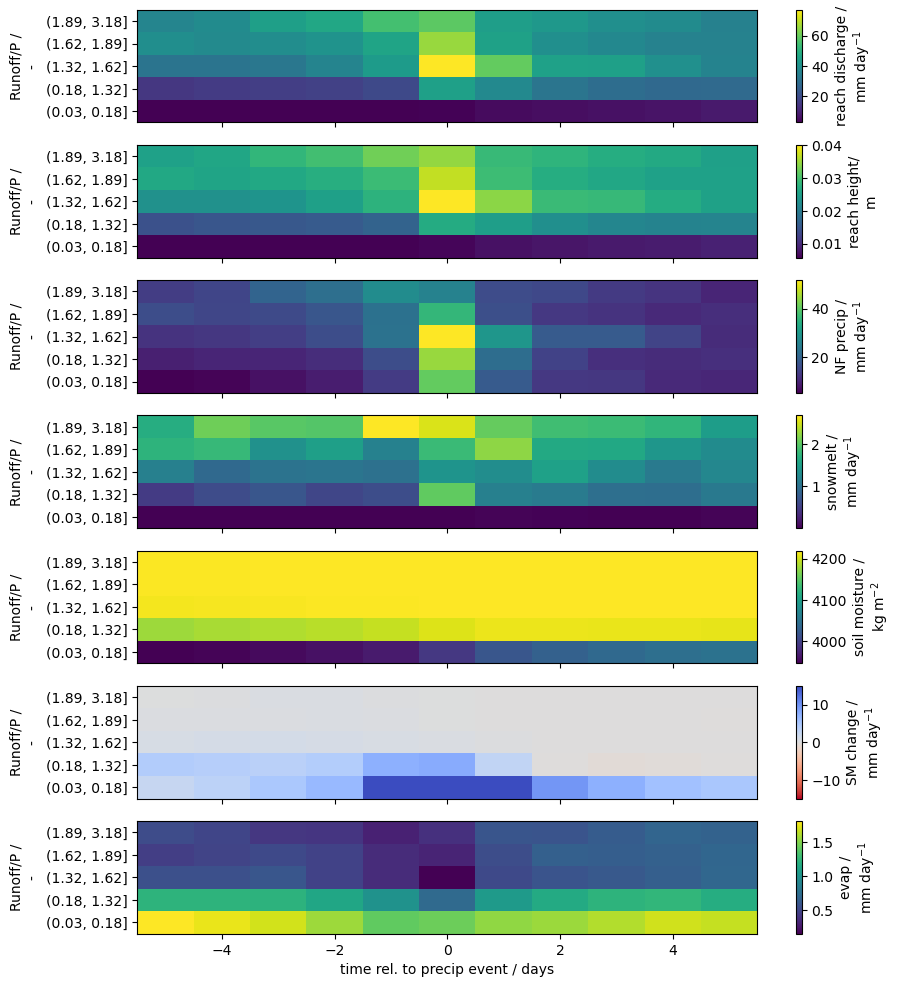

In [9]:
fig, axs = plt.subplots(nrows=7, sharex=True, figsize=(10, 12))
c1 = axs[0].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_reach_discharge)
c2 = axs[1].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_reach_height)
c3 = axs[2].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_nfprecip)
c4 = axs[3].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_snowmelt)
c5 = axs[4].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_soil_moisture)
c6 = axs[5].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_soil_moisture.differentiate('time', datetime_unit='D'),
    cmap='coolwarm_r', vmin=-15, vmax=15)
c7 = axs[6].pcolormesh(
    time, np.arange(0, 100, 20), 
    sharc_data_ro_grouped.case_evap)
[ax.set_yticks(np.arange(0, 100, 20)) for ax in axs]
[ax.set_yticklabels(
    [f'({round(iv.left, 2)}, {round(iv.right, 2)}]' 
     for iv in sharc_data_ro_grouped.case_reach_discharge_nfprecip_frac_bins.values]) 
 for ax in axs]
[ax.set(ylabel='Runoff/P /\n-') for ax in axs]
axs[-1].set(xlabel='time rel. to precip event / days')
[plt.colorbar(c, label=label) 
for c, label in zip(
    [c1, c2, c3, c4, c5, c6, c7],
    ['reach discharge /\nmm day$^{-1}$', 'reach height/\nm', 'NF precip /\nmm day$^{-1}$', 
     'snowmelt /\nmm day$^{-1}$', 'soil moisture /\nkg m$^{-2}$', 
     'SM change /\nmm day$^{-1}$', 'evap /\nmm day$^{-1}$'])]
# plt.savefig(
#     'plots/runoff/sharc_providence_comp_20mm_events_discharge_P_frac_percentile_timeseries.png', 
    # dpi=300, bbox_inches='tight')
# axs[-1].set(xlim=[time[4], time[14]])

In [18]:
sharc_data.soil_liq

<xarray.DataArray 'soil_liq' (case: 287, time: 30, zfull_soil: 20, ptid: 6)>
[1033200 values with dtype=float32]
Coordinates:
  * time        (time) timedelta64[ns] -9 days -8 days ... 19 days 20 days
  * ptid        (ptid) float64 1.0 2.0 3.0 4.0 5.0 6.0
  * zfull_soil  (zfull_soil) float64 0.01 0.04 0.08 0.125 ... 4.5 5.5 6.75 8.75
    grid_index  float64 ...
    lon         float64 ...
    lat         float64 ...
    geolat_t    float32 ...
    geolon_t    float32 ...
  * case        (case) int64 0 1 2 3 4 5 6 7 ... 279 280 281 282 283 284 285 286

## Scatter plot of precip vs. runoff / reach discharge

In [50]:
land_static

<xarray.Dataset>
Dimensions:       (bnds: 2)
Coordinates:
    lat           float64 37.25
    lon           float64 -119.1
Dimensions without coordinates: bnds
Data variables: (12/24)
    geolat_t      float64 ...
    geolon_t      float64 ...
    lat_bnds      (bnds) float64 ...
    lon_bnds      (bnds) float64 ...
    residualFrac  float32 ...
    frac_glac     float32 ...
    ...            ...
    soil_Ksat     float32 ...
    soil_area     float32 ...
    soil_rlief    float32 ...
    soil_sat      float32 ...
    soil_type     float32 ...
    soil_wilt     float32 ...
Attributes:
    external_variables:  cell_area

In [132]:
model_plot_params = {
    'ts': {
        'var': 'ts',
        'label': 'Ts / °C',
        'scaling': 1,
        'offset': -273.15,
        'vmin': -10,
        'vmax': 10,
        'cmap_day': 5,
        'cmap': 'coolwarm',
    },
    'mrso': {
        'var': 'mrso',
        'label': 'soil saturation / -',
        'scaling': land_static.mrsofc**-1,
        'offset': 0,
        'vmin': 0.7,
        'vmax': 1,
        'cmap_day': 4,
        'cmap': 'viridis',
    },
    'mrsos': {
        'var': 'mrsos',
        'label': 'mrsos / kg m$^{-2}$',
        'scaling': 1,
        'offset': 0,
        'vmin': 0,
        'vmax': 45,
        'cmap_day': 4,
        'cmap': 'viridis',
    },
    'snow': {
        'var': 'snw',
        'label': 'snow / kg m$^{-2}$',
        'scaling': 1,
        'offset': 0,
        'vmin': 0,
        'vmax': 100,
        'cmap_day': 5,
        'cmap': 'viridis',
    },
}

sharc_plot_params = {
    'ts': {
        'var': 't_surf',
        'label': 'Ts / °C',
        'scaling': 1,
        'offset': -273.15,
        'vmin': -10,
        'vmax': 10,
        'cmap_day': 5,
        'cmap': 'coolwarm',
    },
    'mrso': {
        'var': 'soil_liq',
        'ptid': 1,
        'zfull_soil': 0,
        'label': 'soil_liq top layer / kg m$^{-3}$',
        'scaling': 1,
        'offset': 0,
        'vmin': 100,
        'vmax': 500,
        'cmap_day': 4,
        'cmap': 'viridis',
    },
    'mrsos': {
        'var': 'soil_liq',
        'ptid': 1,
        'zfull_soil': 0,
        'label': 'soil_liq top layer / kg m$^{-3}$',
        'scaling': 1,
        'offset': 0,
        'vmin': 100,
        'vmax': 500,
        'cmap_day': 4,
        'cmap': 'viridis',
    },
    'snow': {
        'var': 'snow',
        'ptid': 1,
        'label': 'snow / kg m$^{-2}$',
        'scaling': 1,
        'offset': 0,
        'vmin': 0,
        'vmax': 100,
        'cmap_day': 5,
        'cmap': 'viridis',
    },
}

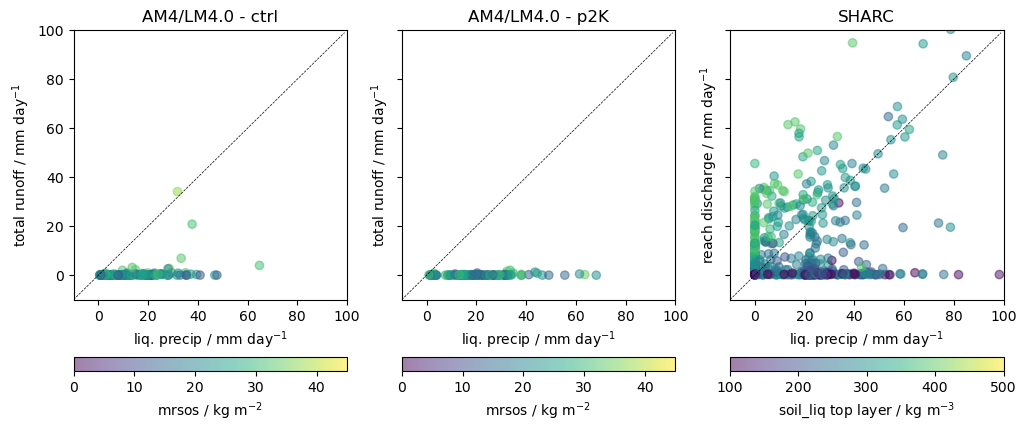

In [134]:
plot_var = 'mrsos'
params = model_plot_params[plot_var]
fig, axs = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12, 5))
axs[0].plot(np.arange(-10, 100), np.arange(-10, 100), 'k--', lw=0.5)
s1 = axs[0].scatter(
    (model_data.prli[:, 5])*86400, 
     model_data.mrro[:, 5]*86400,
    c=(model_data[params["var"]][:, params["cmap_day"]] + params["offset"]) * params["scaling"],
    alpha=0.5, vmin=params["vmin"], vmax=params["vmax"], cmap=params["cmap"])
plt.colorbar(s1, orientation='horizontal', label=params["label"])
#p2K
axs[1].plot(np.arange(-10, 100), np.arange(-10, 100), 'k--', lw=0.5)
s2 = axs[1].scatter(
    (model_p2K_data.prli[:, 5])*86400, 
     model_p2K_data.mrro[:, 5]*86400,
    c=(model_p2K_data[params["var"]][:, params["cmap_day"]] + params["offset"]) * params["scaling"],
    alpha=0.5, vmin=params["vmin"], vmax=params["vmax"], cmap=params["cmap"])
plt.colorbar(s2, orientation='horizontal', label=params['label'])
axs[2].plot(np.arange(-10, 100), np.arange(-10, 100), 'k--', lw=0.5)
#SHARC
params = sharc_plot_params[plot_var]
plot_data = sharc_data[params['var']].isel(time=params['cmap_day'])
if 'ptid' in params.keys():
    plot_data = plot_data.sel(ptid=params['ptid'])
if 'zfull_soil' in params.keys():
    plot_data = plot_data.isel(zfull_soil=params['zfull_soil'])
s3 = axs[2].scatter(
    (sharc_data.lprec[:, 5]) * 86400,
    sharc_data.reach_discharge[:, 5, 0]*86400,
    c=(plot_data + params['offset']) * params['scaling'],
    alpha=0.5, vmin=params['vmin'], vmax=params['vmax'], cmap=params['cmap'])
plt.colorbar(s3, orientation='horizontal', label=params['label'])
axs[0].set(
    xlabel='liq. precip / mm day$^{-1}$', ylabel='total runoff / mm day$^{-1}$',
    title='AM4/LM4.0 - ctrl')
axs[1].set(
    xlabel='liq. precip / mm day$^{-1}$', ylabel='total runoff / mm day$^{-1}$',
    title='AM4/LM4.0 - p2K')
axs[2].set(
    xlim=[-10, 100], ylim=[-10, 100], 
    xlabel='liq. precip / mm day$^{-1}$', ylabel='reach discharge / mm day$^{-1}$',
    title='SHARC')
plt.savefig(
    f'plots/runoff/providence_scatter_20mm_events_prli_runoff_{plot_var}_LM4_p2K_SHARC.png', 
    dpi=300, bbox_inches='tight')

In [94]:
plot_data = sharc_data[params['var']].isel(time=params['cmap_day'])
if 'ptid' in params.keys():
    plot_data = plot_data.sel(ptid=params['ptid'])
if 'zfull_soil' in params.keys():
    plot_data = plot_data.isel(zfull_soil=params['zfull_soil'])
plot_data

<xarray.DataArray 'soil_liq' (case: 1282)>
[1282 values with dtype=float32]
Coordinates:
    time        timedelta64[ns] -1 days
    ptid        float64 1.0
    zfull_soil  float64 0.01
    grid_index  float64 ...
    lon         float64 ...
    lat         float64 ...
    geolat_t    float32 ...
    geolon_t    float32 ...
  * case        (case) int64 0 1 2 3 4 5 6 ... 1276 1277 1278 1279 1280 1281

Text(0.5, 0.98, 'Crater Lake, days with precip > 20 mm day$^{-1}$')

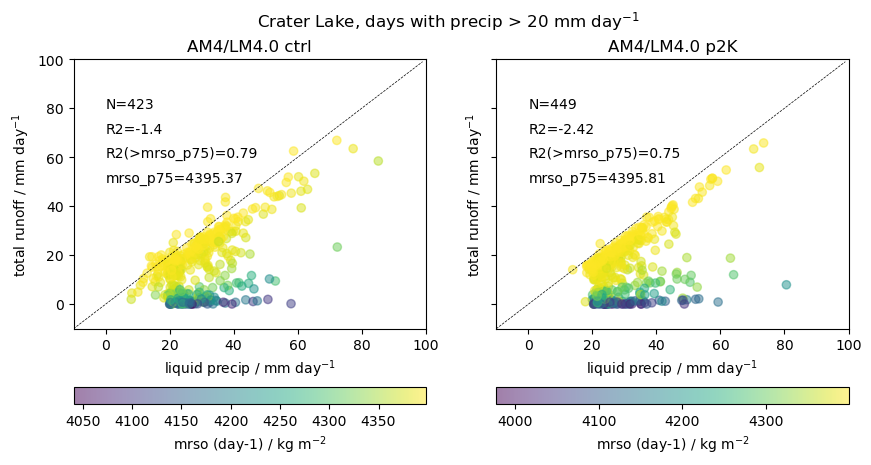

In [27]:
day = 5
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
axs[0].plot(np.arange(-10, 100), np.arange(-10, 100), 'k--', lw=0.5)
s1 = axs[0].scatter(
    (model_data.prli[:, day])*86400, 
     model_data.mrro[:, day]*86400,
    c=(model_data.mrso)[:, day-1],#.differentiate('time', datetime_unit='D'))[:, day],
    alpha=0.5)
plt.colorbar(s1, orientation='horizontal', label='mrso (day-1) / kg m$^{-2}$')
axs[1].plot(np.arange(-10, 100), np.arange(-10, 100), 'k--', lw=0.5)
s2 = axs[1].scatter(
    (model_p2K_data.prli[:, day])*86400, 
     model_p2K_data.mrro[:, day]*86400,
    c=(model_p2K_data.mrso)[:, day-1],#.mrso.differentiate('time', datetime_unit='D'))[:, day],
    alpha=0.5)
plt.colorbar(s2, orientation='horizontal', label='mrso (day-1) / kg m$^{-2}$')
axs[0].set(
    xlabel='liquid precip / mm day$^{-1}$', ylabel='total runoff / mm day$^{-1}$',
    title='AM4/LM4.0 ctrl')
axs[1].set(
    xlim=[-10, 100], ylim=[-10, 100], 
    xlabel='liquid precip / mm day$^{-1}$', ylabel='total runoff / mm day$^{-1}$',
    title='AM4/LM4.0 p2K')
axs[0].text(0, 80, f"N={model_data.case.max().values}")
axs[0].text(0, 70, f"R2={np.round(r2_score(model_data.prli.isel(time=day), model_data.mrro.isel(time=day)), 2)}")
mrso_p75 = model_data.mrso.isel(time=day-1).quantile(0.75)
r2_mrso_p75 = r2_score(
    model_data.prli.isel(time=day).where(model_data.isel(time=day-1).mrso>mrso_p75).dropna('case'), 
    model_data.mrro.isel(time=day).where(model_data.isel(time=day-1).mrso>mrso_p75).dropna('case'))
axs[0].text(0, 60, f"R2(>mrso_p75)={np.round(r2_mrso_p75, 2)}")
axs[0].text(0, 50, f"mrso_p75={np.round(mrso_p75.values, 2)}")
axs[1].text(0, 80, f"N={model_p2K_data.case.max().values}")
axs[1].text(0, 70, f"R2={np.round(r2_score(model_p2K_data.prli.isel(time=day), model_p2K_data.mrro.isel(time=day)), 2)}")
mrso_p75 = model_p2K_data.mrso.isel(time=day-1).quantile(0.75)
r2_mrso_p75 = r2_score(
    model_p2K_data.prli.isel(time=day).where(model_p2K_data.isel(time=day-1).mrso>mrso_p75).dropna('case'), 
    model_p2K_data.mrro.isel(time=day).where(model_p2K_data.isel(time=day-1).mrso>mrso_p75).dropna('case'))
axs[1].text(0, 60, f"R2(>mrso_p75)={np.round(r2_mrso_p75, 2)}")
axs[1].text(0, 50, f"mrso_p75={np.round(mrso_p75.values, 2)}")
fig.suptitle('Crater Lake, days with precip > 20 mm day$^{-1}$')
# plt.savefig(
#     'plots/runoff/crater_lake_scatter_20mm_events_prli_mrro_mrso_R2.png', 
#     dpi=300, bbox_inches='tight')

In [25]:
model_data.mrro.where(model_data.mrso>mrso_p75).dropna('case')

<xarray.DataArray 'mrro' (case: 45, time: 11)>
array([[3.46091954e-04, 1.97286194e-04, 6.41103134e-06, 3.57246290e-06,
        3.58746297e-06, 3.99860573e-06, 2.98501509e-05, 5.28210512e-05,
        3.91609465e-05, 1.31883880e-05, 1.78593385e-04],
       [4.06620296e-04, 3.24146968e-04, 4.98074733e-05, 8.92960634e-06,
        5.56839077e-05, 2.28475052e-04, 2.50667199e-05, 3.52513644e-06,
        3.64276389e-06, 3.63072263e-06, 3.68769201e-06],
       [5.10080508e-06, 3.60467334e-06, 3.63816503e-06, 2.69036464e-05,
        2.88974061e-05, 2.33849772e-04, 1.98847374e-05, 8.25126426e-06,
        3.62669152e-06, 3.65049391e-06, 3.68724568e-06],
       [3.71203487e-06, 3.70390057e-06, 9.80546829e-05, 1.11678137e-05,
        4.73680529e-06, 1.91132887e-04, 3.82514176e-04, 6.68934954e-05,
        3.26523586e-05, 4.15042769e-06, 3.57454473e-06],
       [2.35218813e-05, 9.61684680e-04, 1.47309911e-04, 3.30605486e-04,
        3.63029045e-04, 4.09975910e-04, 2.40738627e-05, 5.39447683e-06,
        2.97779316e-05, 7.99903501e-05, 5.62580062e-05],
       [3.73106764e-06, 3.74332785e-06, 1.99251386e-04, 4.62291382e-06,
        1.20985802e-04, 2.32909297e-04, 7.67240999e-05, 4.32000979e-06,
        3.83502538e-06, 7.49446117e-05, 3.53083965e-06],
       [1.14312206e-04, 6.51059236e-05, 4.99316884e-05, 4.39053338e-06,
        5.74875339e-05, 1.93550513e-04, 2.27693832e-04, 3.50839036e-06,
...
        7.51617772e-05, 1.95497356e-04, 7.45260913e-05, 6.65097759e-05,
        1.51294344e-05, 3.55911038e-06, 3.65907272e-06],
       [3.71992974e-06, 6.13090742e-05, 3.65173082e-06, 3.67647544e-06,
        4.52100812e-06, 3.72170936e-04, 7.87789759e-06, 9.38962421e-06,
        1.93475116e-05, 3.61167395e-06, 6.18918421e-06],
       [6.97622672e-05, 3.99665623e-06, 7.63916250e-06, 3.37199635e-05,
        3.90406967e-06, 1.65273494e-04, 9.89386244e-05, 5.51837984e-05,
        3.42801577e-05, 2.45887466e-04, 2.52933132e-05],
       [3.90406967e-06, 1.65273494e-04, 9.89386244e-05, 5.51837984e-05,
        3.42801577e-05, 2.45887466e-04, 2.52933132e-05, 1.34337140e-04,
        1.09573928e-04, 5.86933238e-05, 2.37226868e-05],
       [2.58109620e-04, 4.02945152e-05, 7.28015002e-05, 1.36323302e-04,
        1.07402397e-04, 1.86775113e-04, 4.10181019e-05, 4.48105311e-06,
        5.24747065e-06, 2.09737278e-04, 6.37315534e-05],
       [1.07402397e-04, 1.86775113e-04, 4.10181019e-05, 4.48105311e-06,
        5.24747065e-06, 2.09737278e-04, 6.37315534e-05, 2.14631335e-04,
        2.18601581e-05, 4.36627761e-06, 3.58015245e-06],
       [1.65346384e-04, 3.55172460e-06, 6.68941311e-06, 1.06912317e-04,
        2.16627141e-05, 2.57823471e-04, 2.42944370e-04, 1.17875818e-04,
        2.52012469e-05, 5.30247553e-06, 3.63380673e-06]], dtype=float32)
Coordinates:
    lat       float64 45.75
    lon       float64 -122.8
  * time      (time) timedelta64[ns] -5 days -4 days -3 days ... 4 days 5 days
  * case      (case) int64 4 70 75 85 105 107 111 ... 392 398 399 412 413 416
    quantile  float64 0.75
Attributes:
    units:            kg m-2 s-1
    long_name:        Total Runoff
    cell_methods:     area: mean time: mean
    ocean_fillvalue:  0.0
    cell_measures:    area: land_area
    time_avg_info:    average_T1,average_T2,average_DT
    standard_name:    runoff_flux
    interp_method:    conserve_order1

In [11]:
model_data

<xarray.Dataset>
Dimensions:             (case: 432, time: 11, bnds: 2)
Coordinates:
  * bnds                (bnds) float64 1.0 2.0
    lat                 float64 ...
    lon                 float64 ...
  * time                (time) timedelta64[ns] -5 days -4 days ... 4 days 5 days
  * case                (case) int64 0 1 2 3 4 5 6 ... 426 427 428 429 430 431
Data variables: (12/24)
    average_DT          (case, time) timedelta64[ns] ...
    average_T1          (case, time) datetime64[ns] ...
    average_T2          (case, time) datetime64[ns] ...
    lat_bnds            (case, time, bnds) float64 ...
    lon_bnds            (case, time, bnds) float64 ...
    time_bnds           (case, time, bnds) object ...
    ...                  ...
    ivty                (case, time) float32 ...
    ar_shape            (case, time) float64 ...
    ar_pr               (case, time) float32 ...
    ar_prsn             (case, time) float32 ...
    ar_prli             (case, time) float32 ...
    strong_precip_date  (case, time) datetime64[ns] ...
Attributes:
    title:                 c192L33_am4p0_amip_HIRESMIP_nudge_wind_1951_1979
    associated_files:      area: 19900101.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  19.1
    git_hash:              c97c1f6afab0df3545ee82c337d51accc4205bc3
    creationtime:          Fri Dec  9 11:26:10 2022
    hostname:              pp034
    history:               fregrid --standard_dimension --input_mosaic C192_m...
    external_variables:    area

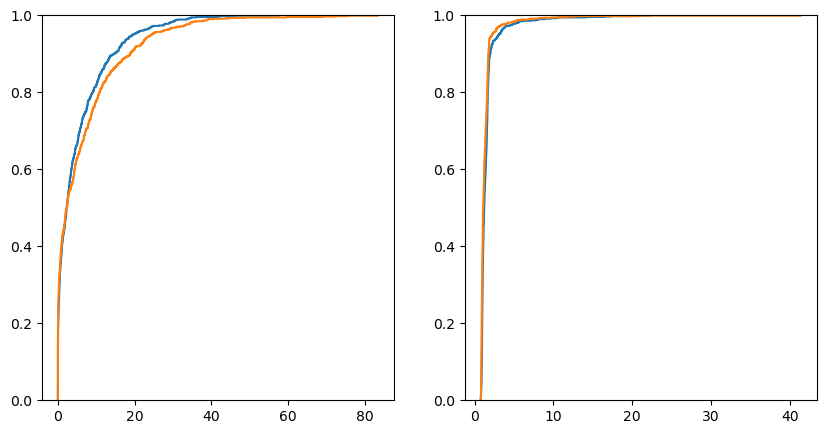

In [19]:
fig, axs = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(10, 5))
axs[0].ecdf(model_data.prli.isel(time=day)*86400,)
axs[0].ecdf(model_p2K_data.prli.isel(time=day)*86400,)
axs[1].ecdf(model_data.mrro.isel(time=day)*86400,)
axs[1].ecdf(model_p2K_data.mrro.isel(time=day)*86400,)

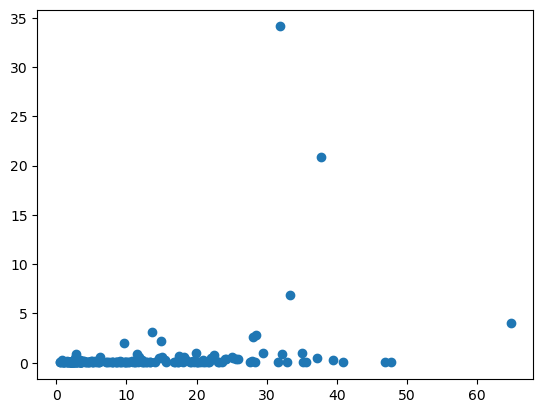

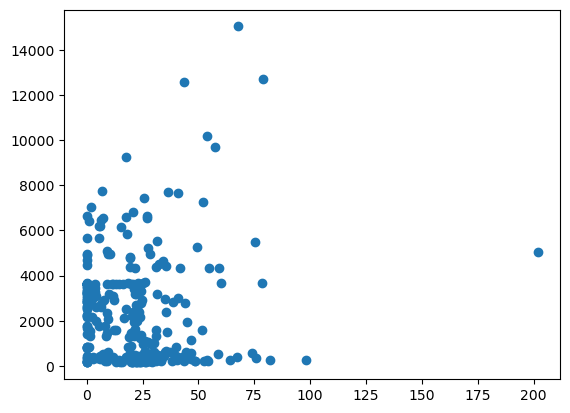

In [22]:
s = plt.scatter(
    (model_data.pr[:, 9] - model_data.prsn[:, 9])*86400, 
    model_data.mrro[:, 9]*86400,)
plt.figure()
s2 = plt.scatter(
    sharc_data.lprec[:, 9] * 86400,
    sharc_data.reach_discharge[:, 9, 0]*86400
)
    # c=(model_data.mrro_nfpr_frac[:, 9]))
# plt.colorbar(s)